In [1]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.1

In [109]:
import math

def PDF_normal(x, mu, sigma):
    '''
    General form of probability density function of univariate normal distribution
    '''
    return math.exp(-((x-mu)**2)/(2*sigma**2))/(sigma*math.sqrt(2*math.pi))

In [189]:
%%manim EvoChangeAnim
# %%manim -ql -n 14 EvoChangeAnim

class EvoChangeAnim(Scene):
    '''
    Scene to observe how adjustments to the mean of a normal distrubtion
    influences the shape of its probability density function
    '''

    def construct(self):
        uncreate_at_end = []
        
        ax = Axes(
            x_range = [0, 10, 1],
            y_range = [0, 0.5, 0.1],
            axis_config = {'include_numbers': False}
        )
        with register_font('./FiraCode-Retina.ttf'):
            y_label = ax.get_y_axis_label(Text(r"Frequency", font="FiraCode Retina", font_size=27), 
                                          edge=LEFT).rotate(PI / 2).next_to(ax, LEFT, buff=.1)
            x_label = ax.get_x_axis_label(Text(r"Trait Value", font="FiraCode Retina", font_size=27), 
                                          edge=DOWN, direction=DOWN, buff=1)
        plot_labels = VGroup(x_label, y_label)

        mu_1 = 3 
        sd_1 = 1.25
        
        curve = ax.plot(lambda x: PDF_normal(x, mu_1, sd_1), color=BLUE)
        
        line_mu_1 = ax.get_vertical_line(ax.input_to_graph_point(mu_1, curve), color=BLUE)
        mu_text = MathTex(rf'\mu_1').next_to(line_mu_1, UP, buff=0.2).set_color(BLUE)
        
        uncreate_at_end.extend([ax, plot_labels, mu_text, line_mu_1, curve])
        
        # self.add(ax, mu_text, mu_value_text)
        curve_ag = AnimationGroup(Create(curve), Create(plot_labels), lag_ratio=0.5)
        mu_ag = AnimationGroup(Create(line_mu_1), Create(mu_text), lag_ratio=0.5)
        self.play(AnimationGroup(Create(ax), curve_ag, mu_ag, lag_ratio=0.75), run_time=4)
        self.wait()
        
        
        # riemann_area = ax.get_riemann_rectangles(curve, x_range=[4, 10], dx=0.03, color=BLUE, fill_opacity=0.5)
        survive_area = ax.get_area(curve, [5.2, 10], color=GREEN, opacity=0.5)
        
        with register_font('./FiraCode-Retina.ttf'):
            survive_text = Text("Survivors", color=GREEN, font='FiraCode Retina', font_size=30)\
                .next_to(survive_area, UP).shift(LEFT, 0.1)
        uncreate_at_end.extend([survive_area])
        
        self.play(AnimationGroup(Create(survive_area), Create(survive_text), lag_ratio=0.1), run_time=1)
        self.wait()
        self.play(Uncreate(survive_text))
        self.wait()
        
        mu_2 = 6
        sd_2 = 1
        
        curve_2 = ax.plot(lambda x: PDF_normal(x, mu_2, sd_2), color=YELLOW)
        line_mu_2 = ax.get_vertical_line(ax.input_to_graph_point(mu_2, curve_2), color=YELLOW)
        mu2_text = MathTex(rf'\mu_2').next_to(line_mu_2, UP, buff=0.2).set_color(YELLOW)
        uncreate_at_end.extend([curve_2, line_mu_2, mu2_text])
        
        mu2_ag = AnimationGroup(Create(line_mu_2), Create(mu2_text), lag_ratio=0.5)
        self.play(AnimationGroup(Create(curve_2), mu2_ag, lag_ratio=0.75), run_time=4)
        self.wait()
        
        whole_plot = VGroup(ax, plot_labels, 
                            curve, line_mu_1, mu_text, survive_area, 
                            curve_2, line_mu_2, mu2_text)
        
        self.play(whole_plot.animate.scale(0.5).to_corner(UP + LEFT))
        self.wait()
        
        with register_font('./FiraCode-Retina.ttf'):
            evo_change_text = Text("How do we measure\nevolutionary change?", 
                                   font='FiraCode Retina', line_spacing=1, font_size=30)\
                .next_to(whole_plot, RIGHT, buff=1)
        self.play(Create(evo_change_text), run_time=1)
        
        self.wait()
        
        above_group = VGroup(whole_plot, evo_change_text)
        haldane_eq = MathTex(r"r~\text{haldanes} = \frac{ \ln \mu_2 - \ln \mu_1 }{ \sigma_{\ln x} ", 
                               r"(t_2 - t_1)", r" }")\
            .next_to(above_group, DOWN, buff=1)        
        
        self.play(Write(haldane_eq))
        self.wait()
        
        framebox1 = SurroundingRectangle(haldane_eq[1], buff = .1, color=RED)
        with register_font('./FiraCode-Retina.ttf'):
            framebox1_text = Text("Number of\ngenerations", font='FiraCode Retina', 
                                  line_spacing=1, font_size=24, color=RED)\
                .next_to(framebox1, RIGHT, buff=.3)

        self.play(Create(framebox1), Create(framebox1_text))
        self.wait()
        
        haldane_eq2 = MathTex(r"r~\text{haldanes}=\frac{\ln \mu_2-\ln \mu_1}{", r"\sigma_{\ln x}", r"}")\
            .next_to(above_group, DOWN, buff=1)
        
        self.play(AnimationGroup(AnimationGroup(FadeOut(framebox1), FadeOut(framebox1_text)), 
                                 TransformMatchingTex(haldane_eq, haldane_eq2), 
                                 lag_ratio=0.5))
        self.wait()
        
        framebox2 = SurroundingRectangle(haldane_eq2[1], buff = .1, color=RED)
        with register_font('./FiraCode-Retina.ttf'):
            framebox2_text = Text("Pooled standard deviation of log-values between generations", font='FiraCode Retina', 
                                  line_spacing=1, font_size=24, color=RED)\
                .next_to(framebox2, DOWN, buff=.3)

        self.play(Create(framebox2), Create(framebox2_text))
        self.wait()
        self.play(Uncreate(framebox2), Uncreate(framebox2_text))
        
        uncreate_at_end.extend([haldane_eq2, evo_change_text])
        
        self.wait()
        self.play(*[Uncreate(obj) for obj in uncreate_at_end], run_time=1.5)

In [11]:
%%manim PooledSD

class PooledSD(Scene):
    '''
    Scene to observe how adjustments to the mean of a normal distrubtion
    influences the shape of its probability density function
    '''

    def construct(self):
        eq = MathTex(r's_{pooled} = \frac{(N_1 - 1) s_1 + (N_2 - 1) s_2}{N_1 + N_2}')
        self.play(Create(eq), run_time=3)
        self.wait()

In [110]:
import pandas as pd

history_df = pd.read_csv('tartarus-zubat-corporis-history.csv')
history_df.describe()

,Crossover Events,Max Generation,Mean Age,Mean Available Energy,Mean Construction Mass,Mean Death Rate,Mean Generation,Mean Genetic Size,Mean Growth Rate,Mean Has Mated,...,Var Meat Digestion Rate,Var Mutations,Var Network Depth,Var Network Size,Var Plant Digestion Rate,Var Retinal Production,Var Size,Var Speed,Var Split Radius,Var Total Mass
count,164678.000000,164678.000000,164678.000000,164678.000000,164678.000000,164678.000000,164678.000000,164678.000000,164678.000000,164678.000000,...,164678.000000,164678.000000,164678.000000,164678.000000,164678.000000,164671.000000,164678.000000,164678.000000,164678.000000,164678.000000
mean,545417.966790,5017.111284,2239.842336,229166.109252,0.015579,0.129675,4878.069082,1.260722,8.018051,0.099778,...,16.354370,1226.919952,0.220623,0.372206,14.833753,0.769839,0.091959,3.890560,0.063765,7885.488981
std,186874.981972,2772.173514,188.220838,21330.575433,0.003039,0.003014,2807.583060,0.028784,0.233857,0.098230,...,3.988129,2901.836805,0.278103,0.483640,2.934067,0.329094,0.010009,14.129821,0.015648,3506.397043
min,0.000000,1.000000,0.000000,100000.000000,0.000000,0.000000,1.000000,1.152540,5.965850,0.000000,...,2.446760,0.000000,0.000000,0.000000,3.399690,0.000000,0.019650,0.000000,0.011640,8.305860
25%,449365.750000,2842.000000,2119.871952,214331.343750,0.013740,0.127720,2446.123782,1.241150,7.859642,0.038710,...,13.718840,125.683312,0.002700,0.070910,12.905475,0.554425,0.085580,3.040062,0.053490,5640.964842
50%,559611.000000,4862.000000,2247.610965,226112.304690,0.015240,0.129450,4850.567140,1.260940,8.016510,0.064520,...,16.276580,250.552750,0.088065,0.226600,14.734140,0.737300,0.090570,3.473465,0.062090,7521.596190
75%,696574.000000,7448.000000,2366.481023,240637.246095,0.017000,0.131360,7394.491088,1.279380,8.172640,0.120000,...,18.860600,514.141223,0.280755,0.399895,16.668017,0.945060,0.096540,3.930508,0.071960,9676.018550
max,826220.000000,9726.000000,3157.911380,370322.156250,0.204930,0.189140,9695.917970,1.370870,8.943970,0.546740,...,36.155630,26305.380860,1.030710,3.063210,32.518320,7.298680,0.406690,2453.419680,0.203380,91720.750000


In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [112]:
features = [col[len('Mean '):] for col in history_df.columns if col.startswith('Mean')]
features.remove('Generation')
print(', '.join(features))

Age, Available Energy, Construction Mass, Death Rate, Genetic Size, Growth Rate, Has Mated, Health, Herbivore Factor, Max Turning, Meat Digestion Rate, Mutations, Network Depth, Network Size, Plant Digestion Rate, Retinal Production, Size, Speed, Split Radius, Total Mass


KeyboardInterrupt: 

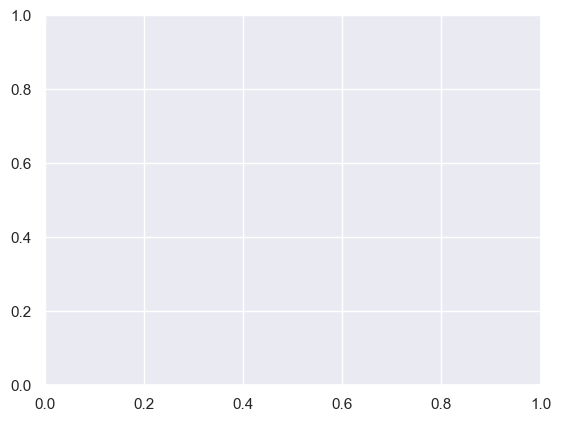

In [113]:
sns.lineplot(data=history_df, x='Mean Generation', y='Mean Max Turning')

In [6]:
rounding = 500
history_df_rounded = history_df.copy()
history_df_rounded['Mean Generation'] = np.round(history_df['Mean Generation'] / rounding) * rounding 
history_df_rounded = history_df_rounded.groupby('Mean Generation').mean().reset_index()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

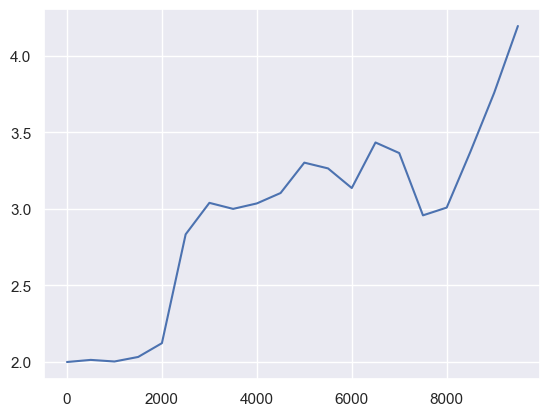

In [7]:
sns.lineplot(data=history_df_rounded, x='Mean Generation', y='Mean Network Depth')

In [114]:
import numpy as np

In [179]:
@np.vectorize
def compute_haldane(trait_var1, trait_mean1, pop1, t1, trait_var2, trait_mean2, pop2, t2):
    ln_mu1 = trait_mean1
    ln_mu2 = trait_mean2
    ln_sd1 = np.sqrt(trait_var1)
    ln_sd2 = np.sqrt(trait_var2)
    pooled_sd = ((pop1 - 1) * ln_sd1 + (pop2 - 1) * ln_sd2) / (pop1 + pop2)
    return (ln_mu2 - ln_mu1) / (pooled_sd * (t2 - t1))

In [180]:
df = history_df_rounded.copy()
for feature in features:
    haldanes = compute_haldane(
        np.array(df[f'Var {feature}'][:-1]),
        np.array(df[f'Mean {feature}'][:-1]),
        np.array(df[f'Protozoa'][:-1]),
        np.array(df[f'Mean Generation'][:-1]),
        np.array(df[f'Var {feature}'][1:]),
        np.array(df[f'Mean {feature}'][1:]),
        np.array(df[f'Protozoa'][1:]),
        np.array(df[f'Mean Generation'][1:])
    )
    df[f'Haldanes {feature}'] = np.concatenate([[0], haldanes])
df.head()

,Mean Generation,Crossover Events,Max Generation,Mean Age,Mean Available Energy,Mean Construction Mass,Mean Death Rate,Mean Genetic Size,Mean Growth Rate,Mean Has Mated,...,Haldanes Meat Digestion Rate,Haldanes Mutations,Haldanes Network Depth,Haldanes Network Size,Haldanes Plant Digestion Rate,Haldanes Retinal Production,Haldanes Size,Haldanes Speed,Haldanes Split Radius,Haldanes Total Mass
0,0.0,29810.582477,154.141121,2195.009651,265759.252506,0.019254,0.132371,1.254953,8.061753,0.341415,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,500.0,146240.132802,520.891947,2286.956111,250277.900462,0.017023,0.132248,1.256406,7.885894,0.371164,...,0.000226,0.027015,0.000390,0.001513,-0.000243,-1.795774e-04,-0.000022,-0.000102,-0.000239,-0.000178
2,1000.0,280008.019696,1058.690765,2242.254965,223313.020946,0.015748,0.130071,1.259210,7.975046,0.246567,...,0.000359,0.022150,-0.000223,0.003933,-0.000328,-3.523538e-05,-0.000092,-0.000075,-0.000297,-0.000040
3,1500.0,368592.964627,1552.968723,2197.486316,241112.954436,0.016262,0.129221,1.272754,8.123139,0.151208,...,-0.001052,0.020629,0.000532,0.000371,0.000875,1.440315e-07,-0.000052,0.000061,-0.000062,-0.000002
4,2000.0,419948.324049,2149.902277,2151.147203,255217.912745,0.017022,0.130204,1.259141,8.108766,0.077454,...,-0.000221,0.012889,0.000865,0.000741,0.000203,-2.012371e-05,0.000027,0.000072,0.000142,-0.000018


In [181]:
df['Mean Generation'][0]

0.0

In [182]:
df[f'Mean Generation'].size

20

In [183]:
n = df[f'Mean Generation'].size - 1
haldanes = {
    feature: 1e5 * h
    for feature in features
    if 1e-7 < (h := float(compute_haldane(
        np.array(df[f'Var {feature}'][0]),
        np.array(df[f'Mean {feature}'][0]),
        np.array(df[f'Protozoa'][0]),
        np.array(df[f'Mean Generation'][0]),
        np.array(df[f'Var {feature}'][n]),
        np.array(df[f'Mean {feature}'][n]),
        np.array(df[f'Protozoa'][n]),
        np.array(df[f'Mean Generation'][n])
    )))
}

In [184]:
interesting_features = [
    'Genetic Size', 'Network Depth', 'Network Size', 
    'Max Turning', 'Herbivore Factor'
]

In [185]:
n = df[f'Mean Generation'].size - 1
haldanes = {
    feature: 1e6 * float(compute_haldane(
        np.array(df[f'Var {feature}'][0]),
        np.array(df[f'Mean {feature}'][0]),
        np.array(df[f'Protozoa'][0]),
        np.array(df[f'Mean Generation'][0]),
        np.array(df[f'Var {feature}'][n]),
        np.array(df[f'Mean {feature}'][n]),
        np.array(df[f'Protozoa'][n]),
        np.array(df[f'Mean Generation'][n])
    ))
    for feature in interesting_features 
}

In [187]:
haldanes

{'Genetic Size': -0.32114668589321027,
 'Network Depth': 481.72918518514825,
 'Network Size': 733.6560342218905,
 'Max Turning': 102.10809276300078,
 'Herbivore Factor': -13.077873838174893}

In [129]:
%%manim -ql BarChartExample

class BarChartExample(Scene):
    def construct(self):
        min_y = min(list(haldanes.values()))
        max_y = max(list(haldanes.values()))

        chart = BarChart(
            values=[round(v, 1) for v in haldanes.values()],
#             values=[0 for _ in haldanes.values()],
            bar_names=[name.replace(' ', r'\\') for name in haldanes.keys()],
#             y_range=[round(min_y, 0), round(max_y, 0), (max_y - min_y) / 10],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        )

        c_bar_lbls = chart.get_bar_labels(font_size=48)

        self.play(Write(chart), Write(c_bar_lbls), run_time=3, rate_func=rate_functions.smooth)
        
#         chart.change_bar_values(reversed([round(v, 1) for v in haldanes.values()]))

In [195]:
%%manim HaldaneBar

class HaldaneBar(Scene):
    def construct(self):
        min_y = min(list(haldanes.values()))
        max_y = max(list(haldanes.values()))

        sorted_traits = sorted(haldanes, key=haldanes.get)
        
        chart = BarChart(
            values=[haldanes[trait] for trait in sorted_traits],
            bar_names=[trait.replace(' ', r'\\') for trait in sorted_traits],
            y_range=[min(0, min_y), max(0, max_y), round(max_y / 6, 2)],
            y_length=6, x_length=10,
            x_axis_config={"font_size": 36},
        )
        chart.change_bar_values([0] * len(haldanes.values()))

        c_bar_lbls = chart.get_bar_labels(font_size=48)

        self.play(Write(chart), run_time=3)

        for i in range(len(sorted_traits)):
            values = [
                round(haldanes[trait], 1) if j <= i else 0
                for j, trait in enumerate(sorted_traits)
            ]
            self.play(chart.animate.change_bar_values(values))
            self.play(Write(chart.get_bar_labels(font_size=48)[i]))

In [155]:
values_target=[-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]

chart = BarChart(
    [0] * len(values_target),
    y_range=[-10, 10, 2],
    y_axis_config={"font_size": 24},
)

BarChart(VGroup of 11 submobjects, NumberLine, NumberLine)

In [153]:
%%manim -ql ChangeBarValuesExample 

class ChangeBarValuesExample(Scene):
    def construct(self):
        values_target=[-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]

        chart = BarChart(
            [0] * len(values_target),
            y_range=[-10, 10, 2],
            y_axis_config={"font_size": 24},
        )
        self.add(chart)
#         self.play(chart.animate.change_bar_values(values))
        
        for i, val in enumerate(values_target):
            values = [v if j <= i else 0 for j, v in enumerate(values_target)]
            self.play(chart.animate.change_bar_values(values))
            self.play(Write(chart.get_bar_labels()[i]))

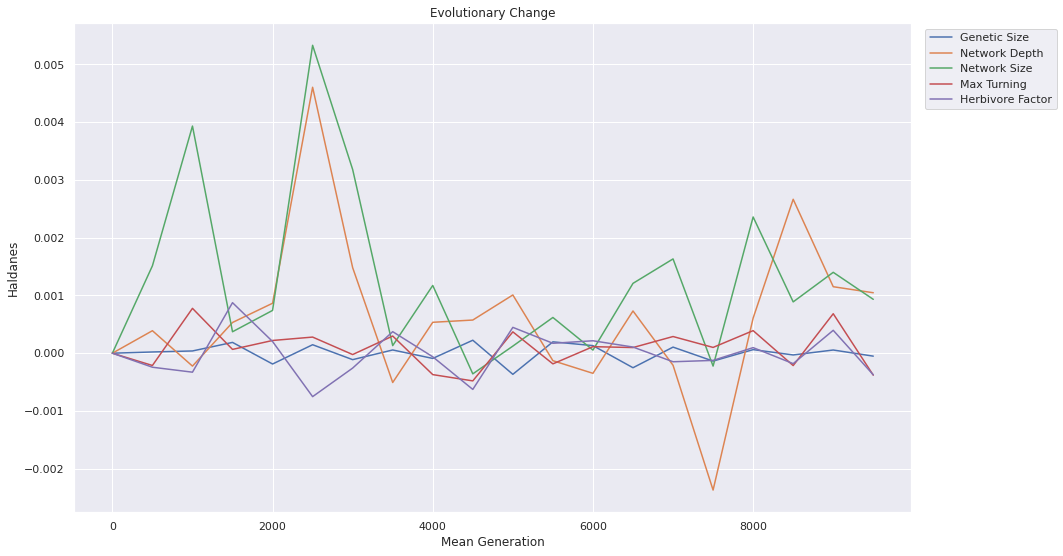

In [14]:
plt.figure(figsize=(15, 9))
for feature in ['Genetic Size', 'Network Depth', 'Network Size', 'Max Turning', 'Herbivore Factor']:
    sns.lineplot(data=df, x='Mean Generation', y=f'Haldanes {feature}', label=feature)
    
plt.title('Evolutionary Change')
plt.ylabel('Haldanes')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

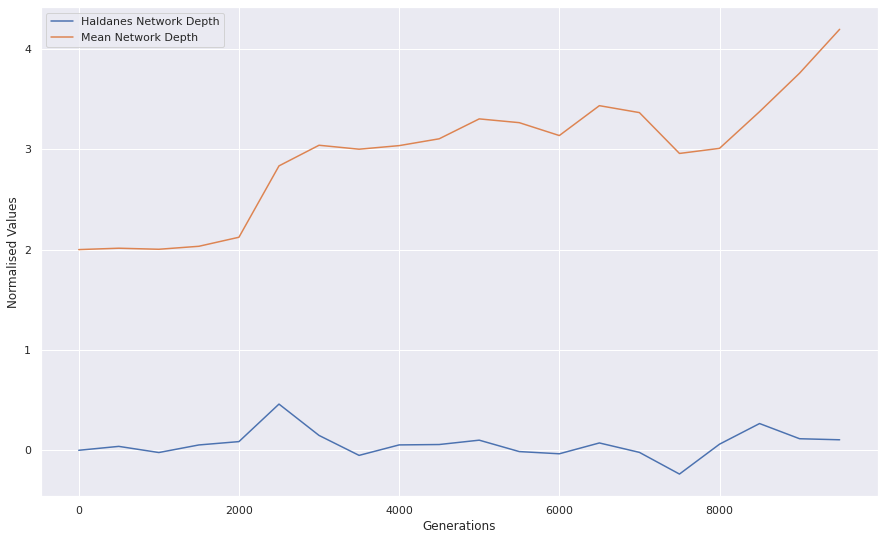

In [77]:
df_normed = df.copy()
cols = ['Haldanes Network Depth', 'Mean Network Depth']
# for col in cols:
#     df_normed[col] /= df_normed[col].max()

df_normed['Haldanes Network Depth'] *= 100

plt.figure(figsize=(15, 9))
for col in cols:
    sns.lineplot(data=df_normed, x='Mean Generation', y=col, label=col)

plt.ylabel('Normalised Values')
plt.xlabel('Generations')
plt.legend()

In [196]:
# feat = 'Herbivore Factor'
feat = 'Genetic Size'
# feat = 'Network Depth'

animate_df = history_df_rounded[['Mean Generation', f'Mean {feat}', f'Var {feat}', 'Protozoa']]

min_trait = max(0, animate_df[f'Mean {feat}'].min() - 2 * np.sqrt(animate_df[f'Var {feat}'].max()))
max_trait = animate_df[f'Mean {feat}'].max() + 2 * np.sqrt(animate_df[f'Var {feat}'].max())

animate_df[f'Var {feat}'] = animate_df[f'Var {feat}'].apply(lambda x: max(0.01, x))

C:\Users\dylan\AppData\Local\Temp\ipykernel_22384\3425040228.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animate_df[f'Var {feat}'] = animate_df[f'Var {feat}'].apply(lambda x: max(0.01, x))


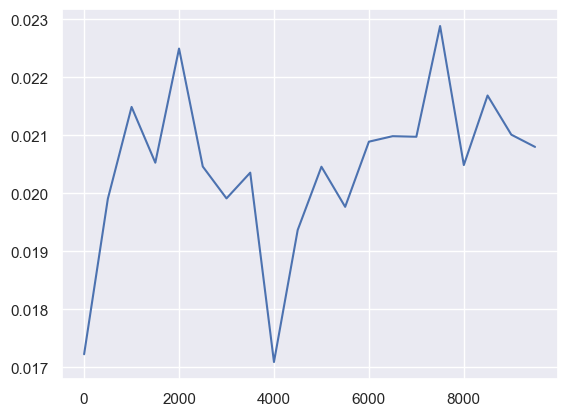

In [197]:
plt.plot(animate_df['Mean Generation'], animate_df[f'Var {feat}'])
plt.show()

In [190]:
import numpy as np
import itertools

In [191]:
%%manim EvoChangeAnimFromData


class EvoChangeAnimFromData(Scene):
    
    def construct(self):
        
        max_y = max([
            PDF_normal(row[f'Mean {feat}'], row[f'Mean {feat}'], max(0.05, np.sqrt(row[f'Var {feat}'])))
            for _, row in animate_df.iterrows()
        ])
    
        ax = Axes(
            x_range = [min_trait, max_trait, (max_trait - min_trait)],
            y_range = [0, max_y, max_y],
            axis_config = {'include_numbers': False},
            x_length=6, y_length=5
        ).to_edge(LEFT, 1)
        
        with register_font('./FiraCode-Retina.ttf'):
            y_label = ax.get_y_axis_label(Text(r"Frequency", font="FiraCode Retina", font_size=27), 
                                          edge=LEFT).rotate(PI / 2).next_to(ax, LEFT, buff=.1)
            x_label = ax.get_x_axis_label(Text(feat, font="FiraCode Retina", font_size=27), 
                                          edge=DOWN, direction=DOWN, buff=.5)
        plot_labels = VGroup(x_label, y_label)
        
        max_gen = 10**round(np.log10(animate_df['Mean Generation'].max()))
        max_y = animate_df[f'Mean {feat}'].max() * 1.05
        min_y = animate_df[f'Mean {feat}'].min() * 0.95
        ax2 = Axes(
            y_range = [min_y, max_y, max_y - min_y],
            x_range = [0, max_gen, max_gen / 5],
            axis_config = {'include_numbers': True},
            x_axis_config = {'decimal_number_config': {'num_decimal_places': 0}},
            y_axis_config = {'include_numbers': False},
            x_length=6, y_length=5
        ).next_to(ax, RIGHT, buff=0.5)
        
        with register_font('./FiraCode-Retina.ttf'):
            y_label2 = ax2.get_y_axis_label(Text(f"Mean {feat}", font="FiraCode Retina", font_size=27), 
                                            edge=LEFT).rotate(PI / 2).next_to(ax2, LEFT, buff=.1)
            x_label2 = ax2.get_x_axis_label(Text("Time (Generations)", font="FiraCode Retina", font_size=27), 
                                            edge=DOWN, direction=DOWN, buff=.3)
        plot_labels2 = VGroup(x_label2, y_label2)
    
        mu = ValueTracker(animate_df.iloc[0, :][f'Mean {feat}'])
        sd = ValueTracker(np.sqrt(animate_df.iloc[0, :][f'Var {feat}']))
        t = ValueTracker(int(animate_df.iloc[0, :][f'Mean Generation']))

        mu_text = MathTex(r'\mu = ').set_color(YELLOW)
        mu_value_text = always_redraw(
            lambda: DecimalNumber(num_decimal_places=4)
            .set_value(mu.get_value())
            .next_to(mu_text, RIGHT, buff=0.2)
            .set_color(YELLOW)
        )

        sd_text = MathTex(r'\sigma = ').next_to(mu_value_text, RIGHT, buff=1).set_color(YELLOW)
        sd_value_text = always_redraw(
            lambda: DecimalNumber(num_decimal_places=4)
            .set_value(sd.get_value())
            .next_to(sd_text, RIGHT, buff=0.2)
            .set_color(YELLOW)
        )

        t_text = MathTex(r't = ').next_to(sd_value_text, RIGHT, buff=1).set_color(YELLOW)
        t_value_text = always_redraw(
            lambda: DecimalNumber(num_decimal_places=0) 
            .set_value(t.get_value())
            .next_to(t_text, RIGHT, buff=0.2)
            .set_color(YELLOW)
        )
        
        axs = VGroup(ax, ax2)
        
        curve_params = VGroup(mu_text, mu_value_text, sd_text, sd_value_text, t_text, t_value_text)\
            .next_to(axs, UP, buff=0.5)
        
        curve = always_redraw(
            lambda: ax.plot(
                lambda x: PDF_normal(x, mu.get_value(), sd.get_value()), 
                color=YELLOW, 
                x_range=[min_trait, max_trait, (max_trait - min_trait) / 100]
            )
        )
        
        ts, feat_vals = [animate_df.iloc[0, :][f'Mean Generation']], [animate_df.iloc[0, :][f'Mean {feat}']]
        feat_timeline = always_redraw(
            lambda: ax2.plot_line_graph(ts, feat_vals, vertex_dot_radius=0)
        )
        
        # Start animation
        to_create = [ax, plot_labels, ax2, plot_labels2, curve_params, curve, feat_timeline]
        self.play(*map(Create, to_create), run_time=3)
        # self.add(*to_create)
        self.wait()
        
        for _, row in animate_df.iterrows():
            row_mean = row[f'Mean {feat}']
            row_sd = np.sqrt(row[f'Var {feat}'])
            row_t = int(row['Mean Generation'])
            ts.append(row_t)
            feat_vals.append(row_mean)
            
            self.play(
                mu.animate.set_value(row_mean), 
                sd.animate.set_value(row_sd),
                t.animate.set_value(row_t),
                run_time=.5, rate_func=rate_functions.smooth
            )

        self.play(*map(Uncreate, to_create), run_time=3)